# Explanatory Data Analysis of Website Advertisement View Data of Nearly New Nautical

Nearly New Nautical is a website that allows users to advertise their used boats for sale. The marketing team is preparing a weekly newsletter for boat owners. The newsletter is designed to help sellers to get more views of their boat, as well as stay on top of market trends. The Head of Marketing has laid out an ambitious goal of increasing the number of readers by 75% this year.

They would like to take a look at the recent data and learn more about the characteristics of the most viewed boat listings in the last 7 days - is it the most expensive boats that get the most views? Are there common features among the most viewed boats?

# Importing the Libraries

Let's import the necessary libraries for this EDA process. We are going to use `pandas` and `numpy` for data exploration, preprocessing, data wrangling and data analysis. `Matplotlib` and `seaborn` is going to be used for Data visualization. `Requests` library is going to help us to connect with `API` and extract data from `API`.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests

# Creating the DataFrame 

In [5]:
!ls

 boat_data.csv
 DA+CS+-+Boats+-+Prework.pdf
'Explanatory Data Analysis of Website Advertisement View Data of Nearly New Nautical.ipynb'


In [6]:
df = pd.read_csv('boat_data.csv')
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


# Observing the DataFrame

From the data we can see that, it has 10 Columns and they are as follows:


Column Name|Details
--|--
Price|Character, boat price listed in different currencies (e.g. EUR, Â£, CHF etc.) on the website
Boat Type|Character, type of the boat
Manufacturer|Character, manufacturer of the boat
Type|Character, condition of the boat and engine type(e.g. Diesel, Unleaded, etc.)
Year Built|Numeric, year of the boat built
Length|Numeric, length in meter of the boat
Width|Numeric, width in meter of the boat
Material|Character, material of the boat (e.g. GRP, PVC, etc.)
Location|Character, location of the boat is listed
Number of views last 7 days|Numeric, number of the views of the list last 7 days


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [8]:
df.describe()

,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9879.000000,9832.000000,9888.000000
mean,1893.192860,11.570017,3.520124,149.160801
std,460.201582,6.002820,1.220534,151.819752
min,0.000000,1.040000,0.010000,13.000000
25%,1996.000000,7.470000,2.540000,70.000000
50%,2007.000000,10.280000,3.330000,108.000000
75%,2017.000000,13.930000,4.250000,172.000000
max,2021.000000,100.000000,25.160000,3263.000000


After seeing all the descriptions we can see that the number of `null` values are very small. Besides our primary concern is the `Number of views last 7 days` column and there is no `null` value there. We can say that, we do not have to do anything regarding `null` values.

# Data Preprocessing

At the `Location` and `Price` columns, there are some special characters. To extract actual country location and finding the meaning full currency symbol we have to do data preprocessing.

In [9]:
location_country = []

for x in df.Location:
    x = str(x)
    if x.find('Â') > 0:
        name = x[0:x.find('Â')]
        location_country.append(name)
    else:
        name = x
        location_country.append(name)
        
df['location_country'] = location_country

df['location_country'] = df['location_country'].str.strip()

In [10]:
df.sort_values(by='Number of views last 7 days', ascending=False).head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,location_country
9580,CHF 14900,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",1992,7.70,2.46,Plastic,Switzerland Â» Le Landeron (NE),3263,Switzerland
8723,CHF 35000,Hardtop,Princess power boats,"Used boat,Diesel",1979,11.12,3.88,GRP,Switzerland Â» Neuenburgersee Â» Hauterive,2432,Switzerland
6211,CHF 125900,"Bowrider,Motor Yacht,Sport Boat",Windy power boats,"Used boat,Diesel",2002,12.35,3.48,GRP,Switzerland Â» Lago Maggiore Â» 6600 Locarno,2261,Switzerland
3700,EUR 949000,Hardtop,Pershing power boats,"Used boat,Diesel",2009,20.30,5.20,GRP,Neustadt in Holstein (Ostsee),2154,Neustadt in Holstein (Ostsee)
308,CHF 19900,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1993,6.14,2.34,Plastic,Switzerland Â» Murtensee Â» Avenches,2026,Switzerland


In [11]:
df['location_country'].value_counts().head(20)

Germany               1914
Italy                 1793
France                1229
Switzerland           1112
Netherlands           1056
Croatia (Hrvatska)     810
Spain                  702
United Kingdom         215
Denmark                172
Portugal               135
Austria                 88
Greece                  83
Malta                   72
Turkey                  64
Belgium                 62
Poland                  41
Slovenia                39
nan                     36
Finland                 35
Montenegro              22
Name: location_country, dtype: int64

In [12]:
df['Price'] = df['Price'].str.replace('Â£ ','GBP ')

In [13]:
currencies = list(set([x[:3] for x in df['Price']]))
currencies

['EUR', 'CHF', 'DKK', 'GBP']

# Converting currency to the same unit

We have prices in different currencies. First we should find out the currency in which most of the listings were done. To do further analysis, it is very important to convert all the price into the same currency. We will use `https://exchangeratesapi.io/` as the currency converting `API`. Then we could go further in the EDA process.

In [14]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,location_country
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,Switzerland
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,Germany
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,Switzerland
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,Denmark
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,Germany


In [15]:
df['price_base'] = [x[:3] for x in df.Price]
df['price_base'].str.strip()
df['price_amount'] = [x[3:] for x in df.Price]
df['price_amount'].str.strip()
df['price_amount'] = df['price_amount'].astype('float')
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,location_country,price_base,price_amount
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,Switzerland,CHF,3337.0
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,Germany,EUR,3490.0
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,Switzerland,CHF,3770.0
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,Denmark,DKK,25900.0
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,Germany,EUR,3399.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
 10  location_country             9888 non-null   object 
 11  price_base                   9888 non-null   object 
 12  price_amount                 9888 non-null   float64
dtypes: float64(3), int

In [17]:
pd.DataFrame([x[:3] for x in df['Price']]).describe().loc[['top','freq']]

,0
top,EUR
freq,8430


From here, it is possible to say that most of the observation in this data set has the price in Euro and it would be better to convert all the prices into Euro so that it becomes more easy to do analysis price wise.

In [18]:
url = 'http://api.exchangeratesapi.io/v1/latest?access_key=af2c9657285fdfcd6d22d2d160986aef'
response = requests.get(url)
rates_base_on_euros = response.json()['rates']
rate_base = response.json()['base']
exchange_rates = {x:rates_base_on_euros[x] for x in currencies}
exchange_rates

{'EUR': 1, 'CHF': 1.000126, 'DKK': 7.439483, 'GBP': 0.86151}

In [19]:
df['price_amount_in_euro'] = [df['price_amount'].iloc[x]*(exchange_rates[(df['price_base'].iloc[x])]) for x in range(len(df['price_amount']))]
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,location_country,price_base,price_amount,price_amount_in_euro
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,Switzerland,CHF,3337.0,3337.420462
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,Germany,EUR,3490.0,3490.000000
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,Switzerland,CHF,3770.0,3770.475020
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,Denmark,DKK,25900.0,192682.609700
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,Germany,EUR,3399.0,3399.000000


# Finding the search relation based on Price

For any kind of sells and marketing price plays a vital role.

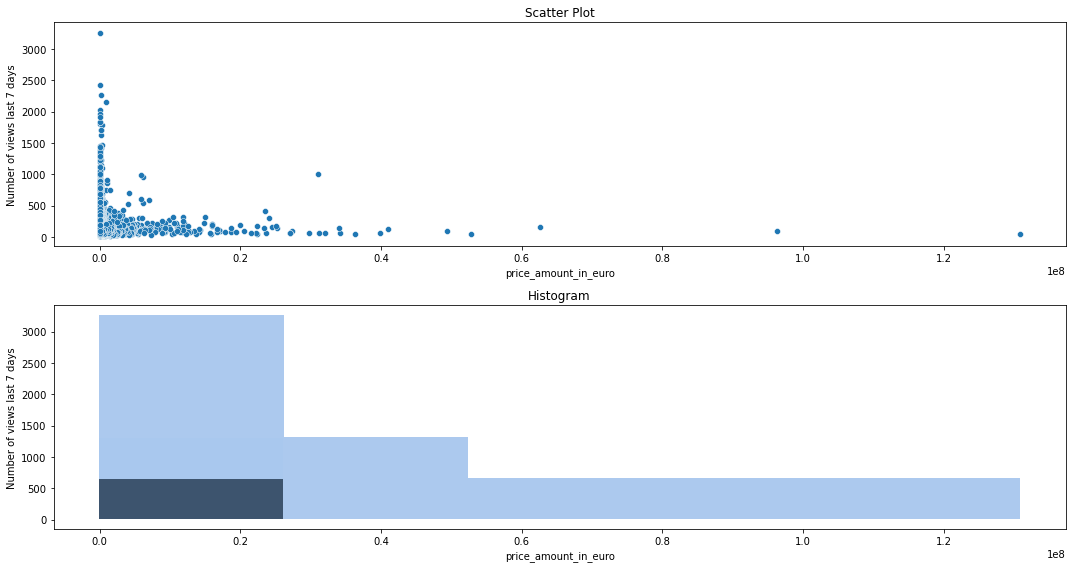

In [17]:
fig = plt.figure()
fig.set_size_inches([15,8])
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.scatterplot(x = 'price_amount_in_euro',
            y = 'Number of views last 7 days',
            data = df,
            ax =ax1)
ax1.title.set_text('Scatter Plot')

sns.histplot(x = 'price_amount_in_euro',
            y = 'Number of views last 7 days',
            data = df,
            bins = 5,
            ax = ax2)
ax2.title.set_text('Histogram')

fig.tight_layout()

# Additional Analysis

In [19]:
df['Number of views last 7 days'].sum()

1474902

In [139]:
top_10_searched = {
    'Manufacturer' : df['Manufacturer'].value_counts().index[:10],
    'Boat Type'    : df['Boat Type'].value_counts().index[:10],
    'Type'               : df['Type'].value_counts().index[:10],
    'Material'            : df['Material'].value_counts().index[:10],
    'Country of Location' : df['location_country'].value_counts().index[:10],
}
top_10_searched_df = pd.DataFrame(top_10_searched)
top_10_searched_df

,Manufacturer,Boat Type,Type,Material,Country of Location
0,BÃ©nÃ©teau power boats,Motor Yacht,"Used boat,Diesel",GRP,Germany
1,Jeanneau power boats,Sport Boat,"Used boat,Unleaded",PVC,Italy
2,Sunseeker power boats,Flybridge,Used boat,Steel,France
3,Princess power boats,Trawler,"new boat from stock,Unleaded",Wood,Switzerland
4,Sea Ray power boats,Pilothouse,new boat from stock,Aluminium,Netherlands
5,Cranchi power boats,Cabin Boat,"new boat from stock,Diesel",Plastic,Croatia (Hrvatska)
6,Azimut power boats,Hardtop,"new boat on order,Unleaded",Carbon Fiber,Spain
7,Bavaria power boats,Center console boat,"Display Model,Unleaded",Thermoplastic,United Kingdom
8,Fairline power boats,Bowrider,new boat on order,Hypalon,Denmark
9,Quicksilver (Brunswick Marine) power boats,Deck Boat,"new boat on order,Diesel",Reinforced concrete,Portugal


In [140]:
df['Manufacturer'].value_counts().head(10)

BÃ©nÃ©teau power boats                        631
Jeanneau power boats                          537
Sunseeker power boats                         383
Princess power boats                          241
Sea Ray power boats                           239
Cranchi power boats                           219
Azimut power boats                            215
Bavaria power boats                           185
Fairline power boats                          172
Quicksilver (Brunswick Marine) power boats    167
Name: Manufacturer, dtype: int64

In [141]:
df['Boat Type'].value_counts().head(10)

Motor Yacht            2720
Sport Boat             1407
Flybridge              1194
Trawler                 679
Pilothouse              613
Cabin Boat              585
Hardtop                 507
Center console boat     369
Bowrider                301
Deck Boat               283
Name: Boat Type, dtype: int64

In [142]:
df['Type'].value_counts().head(10)

Used boat,Diesel                4140
Used boat,Unleaded              1686
Used boat                       1462
new boat from stock,Unleaded    1107
new boat from stock              665
new boat from stock,Diesel       291
new boat on order,Unleaded       150
Display Model,Unleaded            75
new boat on order                 61
new boat on order,Diesel          61
Name: Type, dtype: int64

In [143]:
df['Material'].value_counts().head(10)

GRP                    5484
PVC                    1123
Steel                   939
Wood                    235
Aluminium               229
Plastic                  77
Carbon Fiber             30
Thermoplastic            15
Hypalon                   5
Reinforced concrete       1
Name: Material, dtype: int64

In [144]:
df['location_country'].value_counts().head(10)

Germany               1914
Italy                 1793
France                1229
Switzerland           1112
Netherlands           1056
Croatia (Hrvatska)     810
Spain                  702
United Kingdom         215
Denmark                172
Portugal               135
Name: location_country, dtype: int64

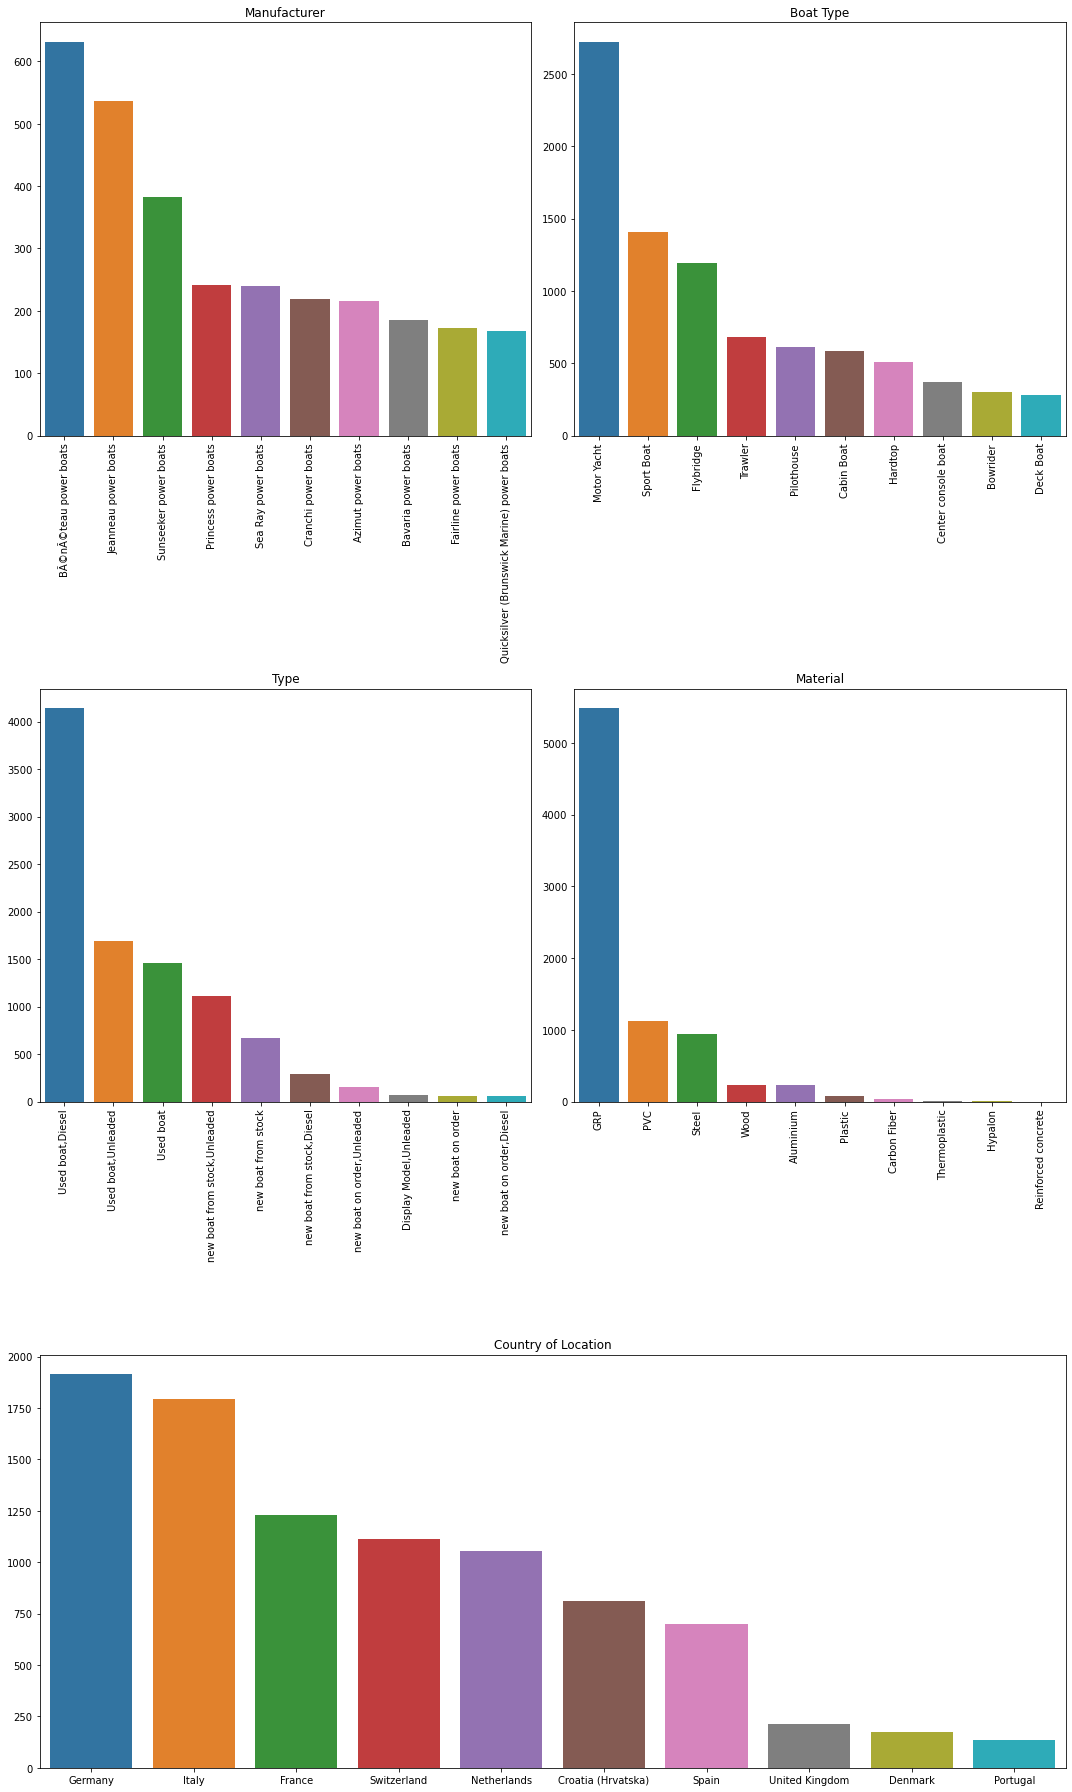

In [145]:
fig = plt.figure()
fig.set_size_inches([15,25])


ax1 = fig.add_subplot(313)
sns.barplot(x = df['location_country'].value_counts().index[:10],
            y= df['location_country'].value_counts().values[:10],
            ax = ax1)
ax1.title.set_text('Country of Location')


ax2 = fig.add_subplot(321)
sns.barplot(x = df['Manufacturer'].value_counts().index[:10],
            y= df['Manufacturer'].value_counts().values[:10],
            ax = ax2)
ax2.title.set_text('Manufacturer')
ax2.tick_params('x', labelrotation=90)

ax3 = fig.add_subplot(322)
sns.barplot(x = df['Boat Type'].value_counts().index[:10],
            y= df['Boat Type'].value_counts().values[:10],
            ax =ax3)
ax3.title.set_text('Boat Type')
ax3.tick_params('x', labelrotation=90)

ax4 = fig.add_subplot(323)
sns.barplot(x = df['Type'].value_counts().index[:10],
            y= df['Type'].value_counts().values[:10],
            ax = ax4)
ax4.title.set_text('Type')
ax4.tick_params('x', labelrotation=90)

ax5 = fig.add_subplot(324)
sns.barplot(x = df['Material'].value_counts().index[:10],
            y= df['Material'].value_counts().values[:10],
            ax = ax5)
ax5.title.set_text('Material')
ax5.tick_params('x', labelrotation=90)

fig.tight_layout()

# Let's Find Out The Pattern

In [146]:
top_10_searched_df['Country of Location'] = top_10_searched_df['Country of Location'].str.strip()
df['location_country'] = df['location_country'].str.strip()

In [147]:
top_10_searched_df

,Manufacturer,Boat Type,Type,Material,Country of Location
0,BÃ©nÃ©teau power boats,Motor Yacht,"Used boat,Diesel",GRP,Germany
1,Jeanneau power boats,Sport Boat,"Used boat,Unleaded",PVC,Italy
2,Sunseeker power boats,Flybridge,Used boat,Steel,France
3,Princess power boats,Trawler,"new boat from stock,Unleaded",Wood,Switzerland
4,Sea Ray power boats,Pilothouse,new boat from stock,Aluminium,Netherlands
5,Cranchi power boats,Cabin Boat,"new boat from stock,Diesel",Plastic,Croatia (Hrvatska)
6,Azimut power boats,Hardtop,"new boat on order,Unleaded",Carbon Fiber,Spain
7,Bavaria power boats,Center console boat,"Display Model,Unleaded",Thermoplastic,United Kingdom
8,Fairline power boats,Bowrider,new boat on order,Hypalon,Denmark
9,Quicksilver (Brunswick Marine) power boats,Deck Boat,"new boat on order,Diesel",Reinforced concrete,Portugal


In [177]:
df_top_searched_in_terms_of_all_criteria = df[(df.Manufacturer.isin(top_10_searched_df.Manufacturer)) & (df['Boat Type'].isin(top_10_searched_df['Boat Type'])) & (df.Type.isin(top_10_searched_df.Type)) & (df.Material.isin(top_10_searched_df.Material)) & (df['location_country'].isin(top_10_searched_df['Country of Location']))]
percentage_all_criteria = (1-(df['Number of views last 7 days'].sum()-df_top_searched_in_terms_of_all_criteria['Number of views last 7 days'].sum())/df['Number of views last 7 days'].sum())*100

df_top_searched_in_terms_of_manufacturer_boat_type_material = df[(df.Manufacturer.isin(top_10_searched_df.Manufacturer)) & (df['Boat Type'].isin(top_10_searched_df['Boat Type'])) & (df.Type.isin(top_10_searched_df.Type)) & (df.Material.isin(top_10_searched_df.Material))]
percentage_manufacturer_boat_type_material = (1-(df['Number of views last 7 days'].sum()-df_top_searched_in_terms_of_manufacturer_boat_type_material['Number of views last 7 days'].sum())/df['Number of views last 7 days'].sum())*100

df_top_searched_in_terms_of_manufacturer_boat_type =df[(df.Manufacturer.isin(top_10_searched_df.Manufacturer)) & (df['Boat Type'].isin(top_10_searched_df['Boat Type'])) & (df.Type.isin(top_10_searched_df.Type))]
percentage_manufacturer_boat_type = (1-(df['Number of views last 7 days'].sum()-df_top_searched_in_terms_of_manufacturer_boat_type['Number of views last 7 days'].sum())/df['Number of views last 7 days'].sum())*100

df_top_searched_in_terms_of_manufacturer_boat = df[(df.Manufacturer.isin(top_10_searched_df.Manufacturer)) & (df['Boat Type'].isin(top_10_searched_df['Boat Type']))]
percentage_manufacturer_boat = (1-(df['Number of views last 7 days'].sum()-df_top_searched_in_terms_of_manufacturer_boat['Number of views last 7 days'].sum())/df['Number of views last 7 days'].sum())*100

df_top_searched_in_terms_of_manufacturer = df[(df.Manufacturer.isin(top_10_searched_df.Manufacturer))]
percentage_manufacturer = (1-(df['Number of views last 7 days'].sum()-df_top_searched_in_terms_of_manufacturer['Number of views last 7 days'].sum())/df['Number of views last 7 days'].sum())*100

df_top_searched_in_terms_of_boat = df[(df['Boat Type'].isin(top_10_searched_df['Boat Type']))]
percentage_boat = (1-(df['Number of views last 7 days'].sum()-df_top_searched_in_terms_of_boat['Number of views last 7 days'].sum())/df['Number of views last 7 days'].sum())*100

df_top_searched_in_terms_of_type = df[(df['Type'].isin(top_10_searched_df['Type']))]
percentage_type = (1-(df['Number of views last 7 days'].sum()-df_top_searched_in_terms_of_type['Number of views last 7 days'].sum())/df['Number of views last 7 days'].sum())*100

df_top_searched_in_terms_of_material = df[(df['Material'].isin(top_10_searched_df['Material']))]
percentage_material = (1-(df['Number of views last 7 days'].sum()-df_top_searched_in_terms_of_material['Number of views last 7 days'].sum())/df['Number of views last 7 days'].sum())*100

df_top_searched_in_terms_of_location = df[(df['location_country'].isin(top_10_searched_df['Country of Location']))]
percentage_location = (1-(df['Number of views last 7 days'].sum()-df_top_searched_in_terms_of_location['Number of views last 7 days'].sum())/df['Number of views last 7 days'].sum())*100

In [176]:
criteria_list = ['Including All Criteria','Including Manufaturer, Boat Type, Type and Material','Including Manufacturer, Boat Type, Type','Including Manufacturer, Boat Type','Only Manufacturer','Only Boat Type','Only Type','Only Material','Only Location']
value_list = [percentage_all_criteria,percentage_manufacturer_boat_type_material,percentage_manufacturer_boat_type,percentage_manufacturer_boat,percentage_manufacturer,percentage_boat,percentage_type,percentage_material,percentage_location]
percentage_dict = {
    'Criteria' : criteria_list,
    'Percentage': value_list}
percentage_df = pd.DataFrame(percentage_dict)
percentage_df

,Criteria,Percentage
0,Including All Criteria,18.158020
1,"Including Manufaturer, Boat Type, Type and Mat...",20.127642
2,"Including Manufacturer, Boat Type, Type",23.993798
3,"Including Manufacturer, Boat Type",24.222559
4,Only Manufacturer,25.899958
5,Only Boat Type,80.801029
6,Only Type,97.851383
7,Only Material,85.666234
8,Only Location,91.158328


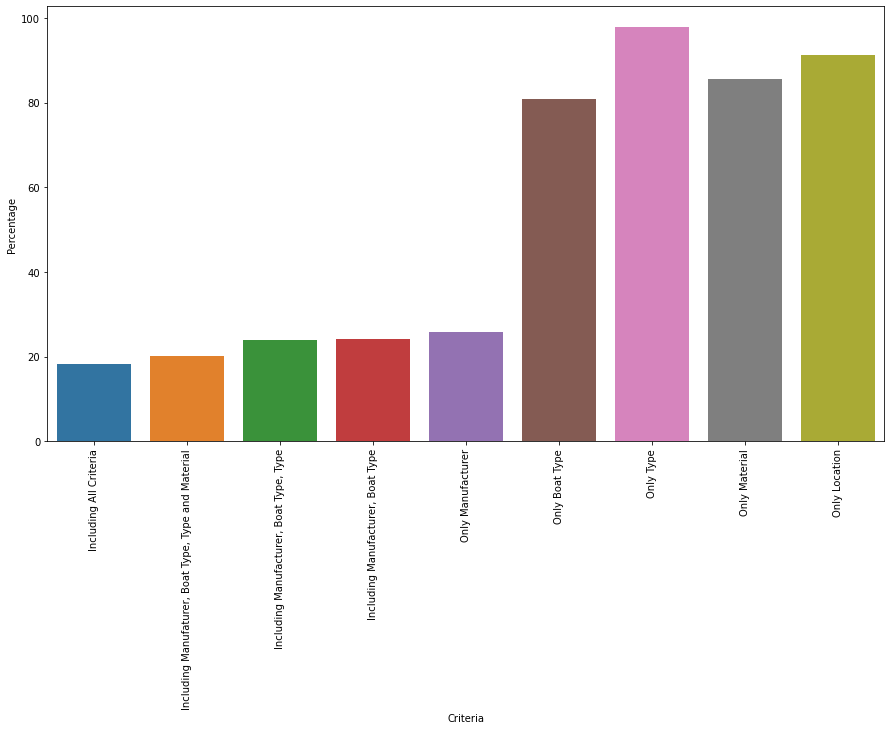

In [174]:
fig = plt.figure()
fig.set_size_inches([15,8])

ax1=fig.add_subplot(111)
sns.barplot(x='Criteria',
            y='Percentage',
            data = percentage_df)
ax1.tick_params('x',rotation=90)